In [1]:
#                                                          Mathematical Transformations
# Some algorithms expect data to be 'linear' i.e they perform better with sort of linear data 
# linear regression , SVM, KNN, NNs, even sometime decision trees etc
# log, reciprocal, power (square, sq. root), Box-cox, Yeo-Johnson transformation's target is to make data more to follow normal distribution

In [2]:
# Function Transformer class of scikit learn ---> log, reciprocal, sq, sq.root, custome transformer  

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # QQ plot

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('csv files/titanic.csv', usecols=['Survived', 'Fare', 'Age'])

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna( df['Age'].mean(), inplace=True )
# handling missing values of Age column

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
X=df.iloc[:,1:3] # all rows and columns from 1 to 3 but not 3 
y = df.iloc[:,0] # all rows and 0th index column

In [10]:
X # input feature

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [11]:
y # target : survived(1) or not(0)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=.2, random_state=42 )

In [13]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [14]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

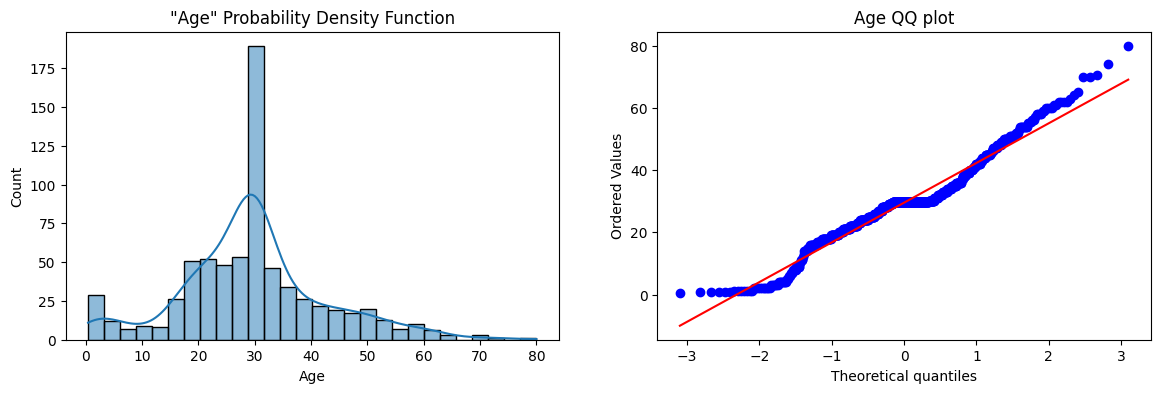

In [18]:
plt.figure(figsize=(14, 4)) # width * height in inch 
plt.subplot(121)            # create multiple plots in a single figure
sns.histplot(X_train['Age'], kde=True)
plt.title('"Age" Probability Density Function')
plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')
plt.show()

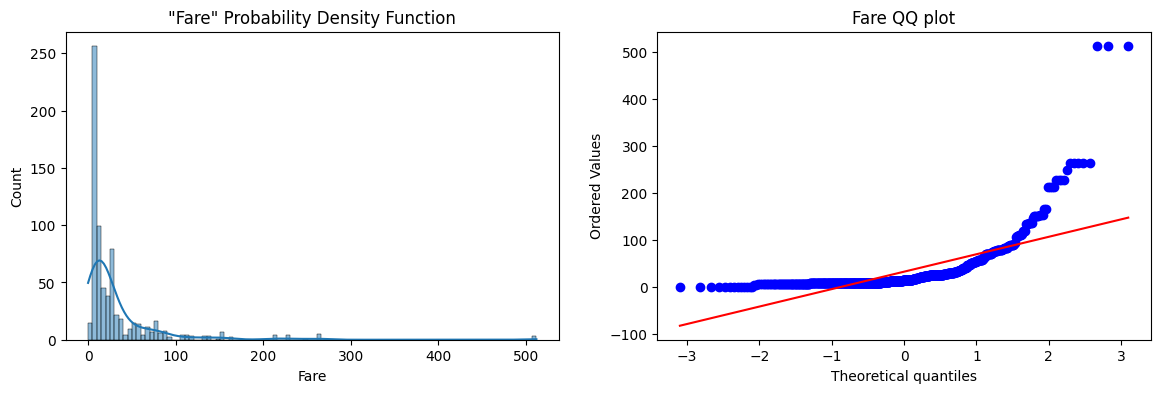

In [19]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('"Fare" Probability Density Function')
plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')
plt.show()

In [20]:
# lets train a model and see accuracy with this data

In [21]:
lr = LogisticRegression ()
dt = DecisionTreeClassifier()

In [23]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)
parameters = dt.get_params()
for parameters, value in parameters.items():
    print(f"{parameters}: {value}")

[[-0.0138331   0.01418295]] [-0.54303643]
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: None
splitter: best


In [24]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)

In [25]:
print('Accuracy Logistic Regression :', accuracy_score(y_test, y_pred1))
print('Accuracy Decision Tree :', accuracy_score(y_test, y_pred2))

Accuracy Logistic Regression : 0.6480446927374302
Accuracy Decision Tree : 0.6871508379888268


In [26]:
# A] applying log transform
trf = FunctionTransformer ( func=np.log1p ) # log1p --> 1 plus and then apply log 

In [27]:
X_train_transformed = trf.fit_transform(X_train) # only transform also good as nothign here to learn 
X_test_transformed = trf.transform (X_test)

In [28]:
lrt=LogisticRegression()
dtt=DecisionTreeClassifier()

lrt.fit(X_train_transformed, y_train)
dtt.fit(X_train_transformed, y_train)

y_pred1_t = lrt.predict (X_test_transformed)
y_pred2_t = dtt.predict( X_test_transformed)

print('Accuracy Logistic Regression after log transform :', accuracy_score(y_test, y_pred1_t))
print('Accuracy Decision Tree after log transform :', accuracy_score(y_test, y_pred2_t))

Accuracy Logistic Regression after log transform : 0.6815642458100558
Accuracy Decision Tree after log transform : 0.6927374301675978


In [29]:
# 64% --> 68%

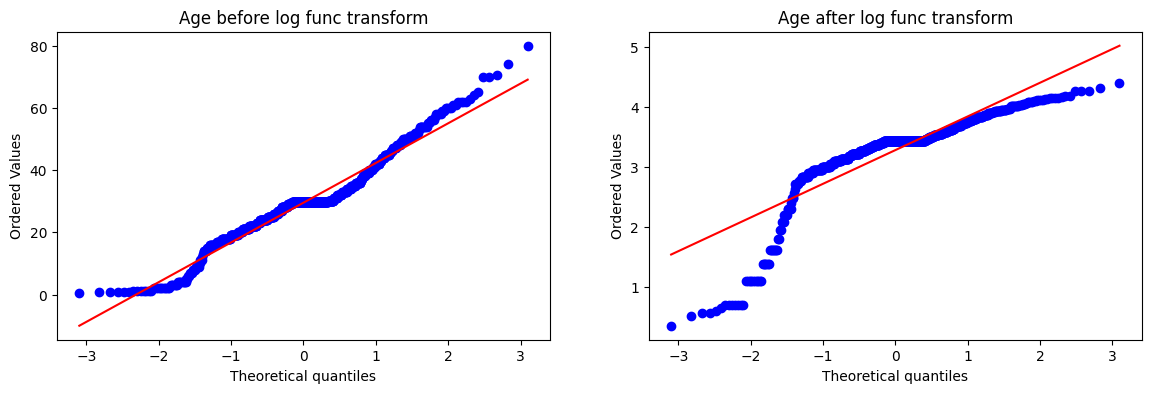

In [30]:
plt.figure(figsize=(14, 4))
plt.subplot(121)    
stats.probplot(X_train['Age'], dist='norm', plot=plt)           
plt.title('Age before log func transform')
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt) 
plt.title('Age after log func transform')
plt.show()

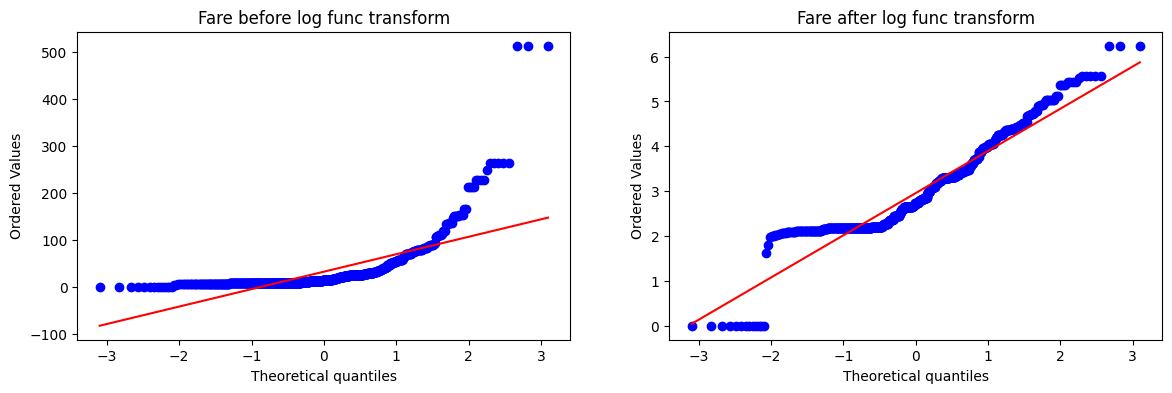

In [31]:
plt.figure(figsize=(14, 4))
plt.subplot(121)    
stats.probplot(X_train['Fare'], dist='norm', plot=plt)           
plt.title('Fare before log func transform')
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt) 
plt.title('Fare after log func transform')
plt.show()

In [32]:
# log function transformation shows better result but not age . So apply log func transformer to Fare column only 

In [33]:
#                                                                                 Custom Transformation 
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    lr = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(lr,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


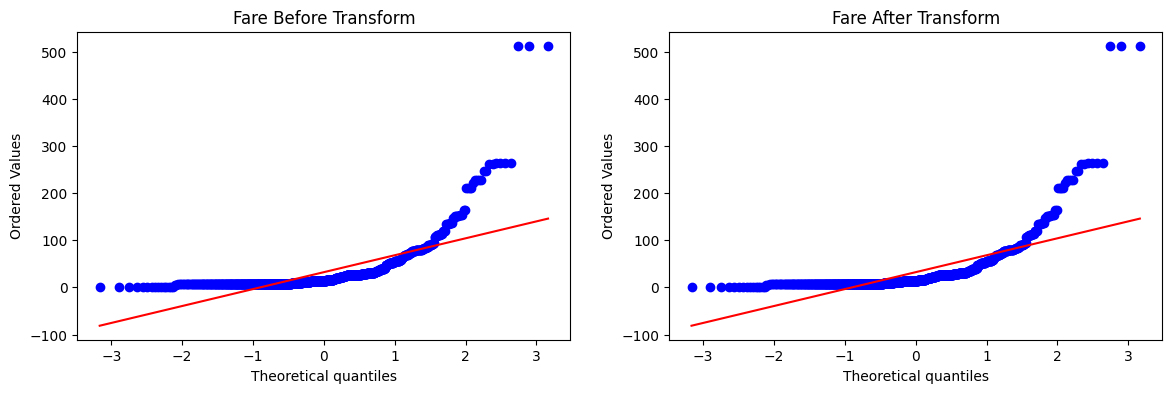

In [34]:
apply_transform(lambda x : x)

Accuracy 0.6431335830212235


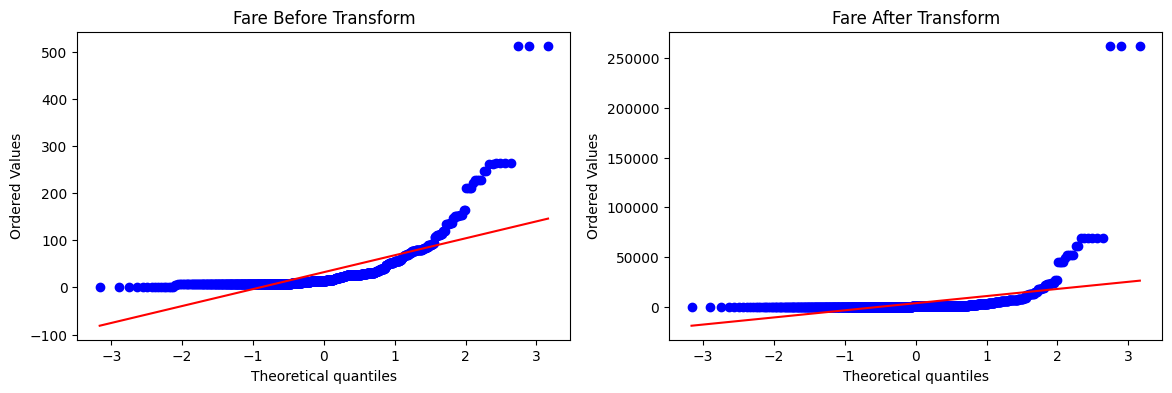

In [35]:
apply_transform(lambda x : x**2)

Accuracy 0.6611485642946316


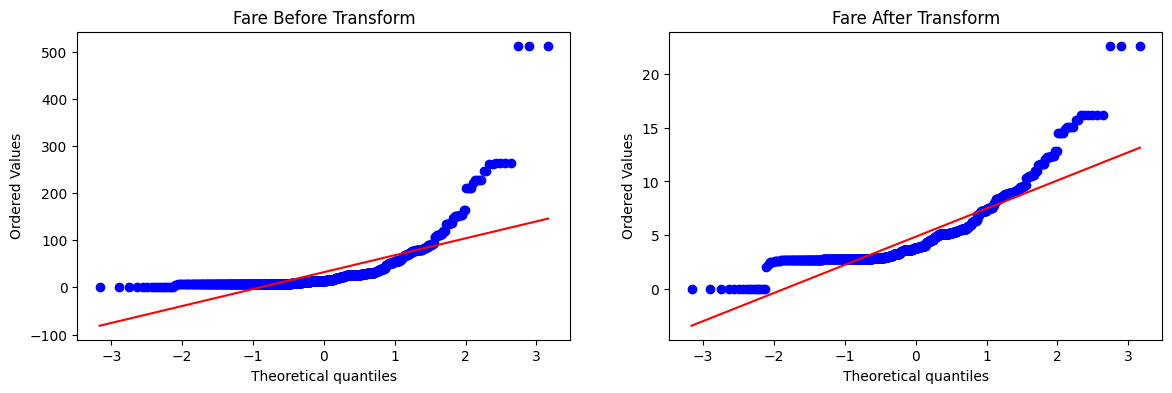

In [36]:
apply_transform(lambda x : x**.5)

Accuracy 0.6678901373283396


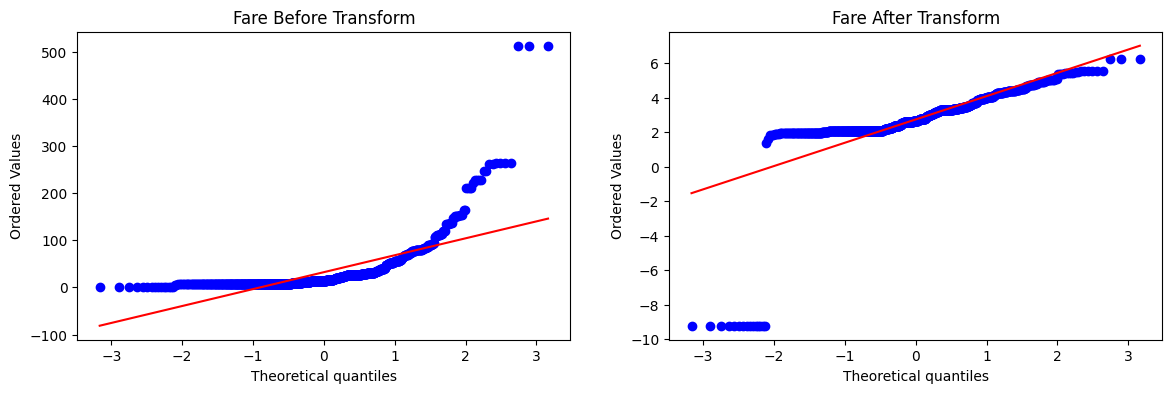

In [37]:
apply_transform(lambda x : np.log(x+0.0001))

Accuracy 0.6195131086142323


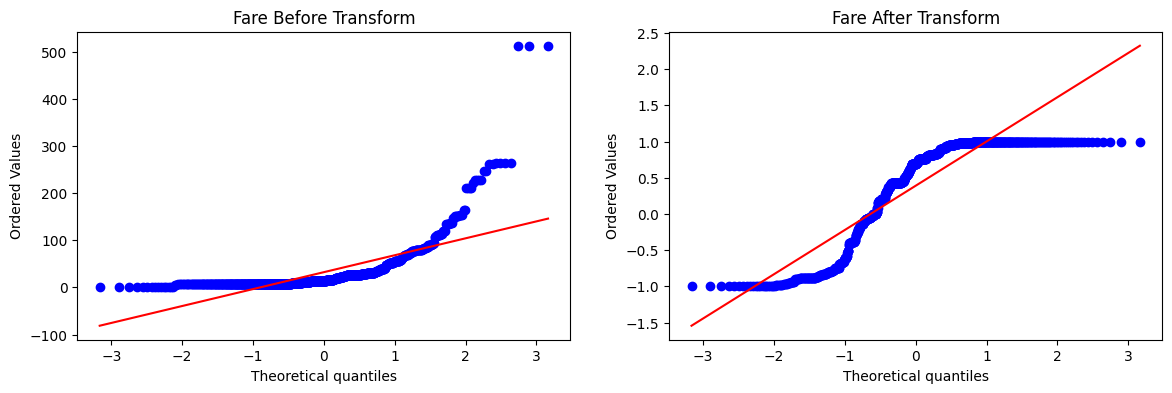

In [38]:
apply_transform(lambda x : np.sin(x))

In [39]:
# log and sq root transform seem good 

In [82]:
#                                                Power Transformer (Box-Cox, Yeo-Johnson)
# Box-Cox transform : general case of above function transformer . Cons: not applicable for 0 and -ve numbers 

In [83]:
df = pd.read_csv('csv files/concrete_data.csv')

In [84]:
df.head(3)
# Strenght --> target column

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [85]:
print(df.shape)
df.isnull().sum()

(1030, 9)


Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [86]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [87]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [88]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [89]:
X_train, X_test, y_train, y_test = train_test_split ( x, y, random_state=42, train_size=.8 )

In [90]:
# X_train
# X_test
# y_train
# y_test

In [91]:
# applying Regression without any transformation 
lr = LinearRegression()
lr.fit (X_train, y_train)

y_pred = lr.predict(X_test)

r2_score (y_test, y_pred)
# r2_score is .62

0.6275531792314848

In [92]:
# Cross Validation
lr = LinearRegression()
np.mean(cross_val_score(lr, x, y, scoring='r2')) # model_object, input_variables,  target_variables, scoring

0.4609940491662864

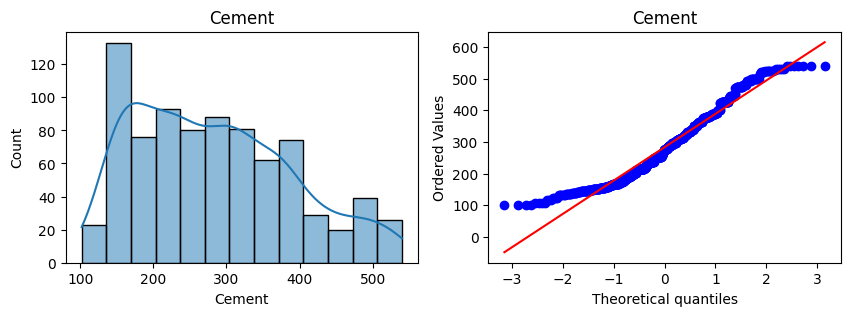

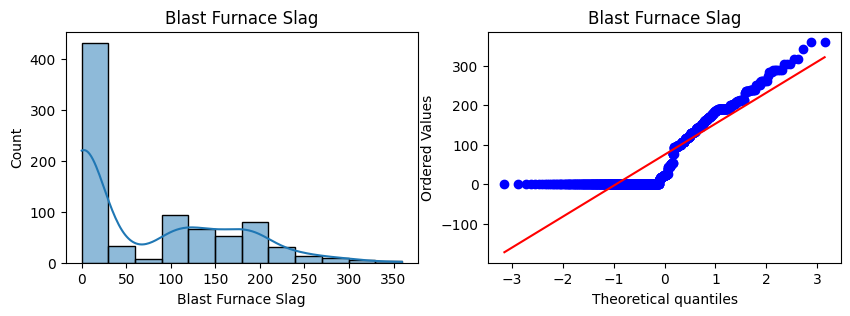

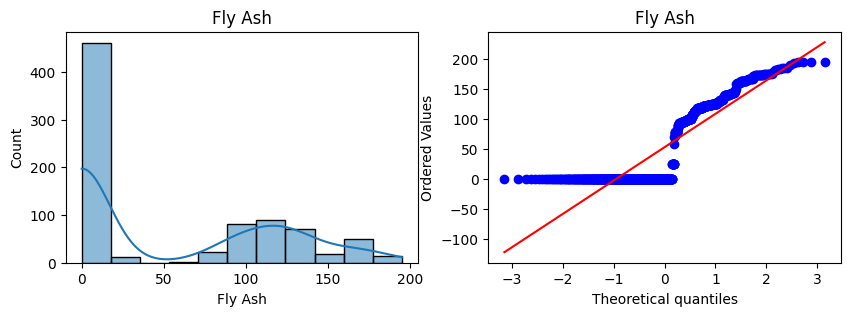

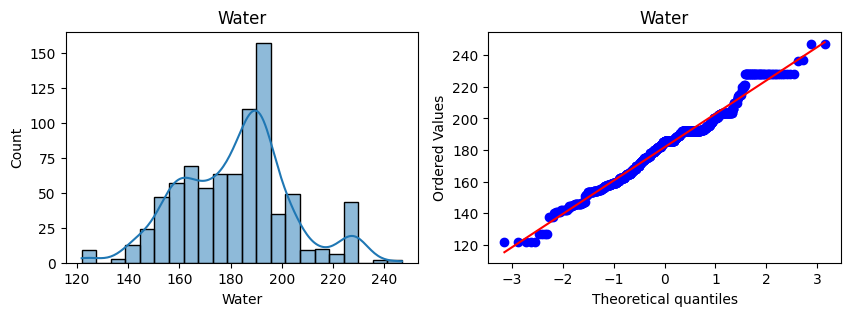

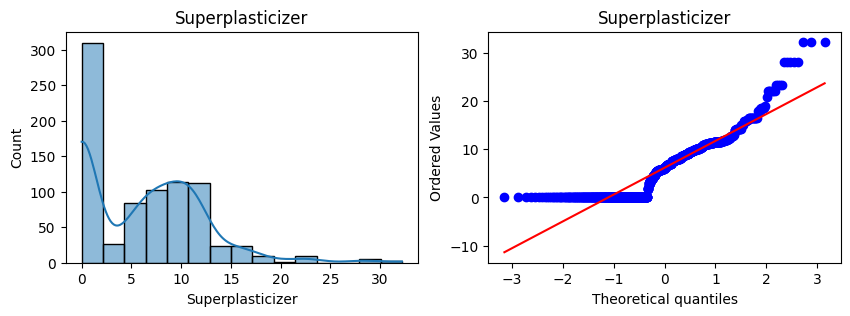

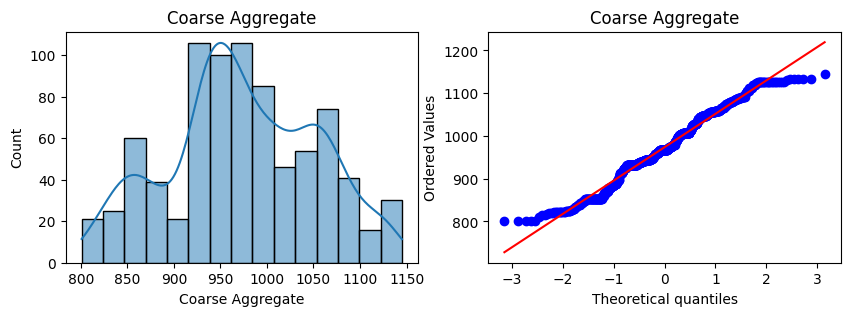

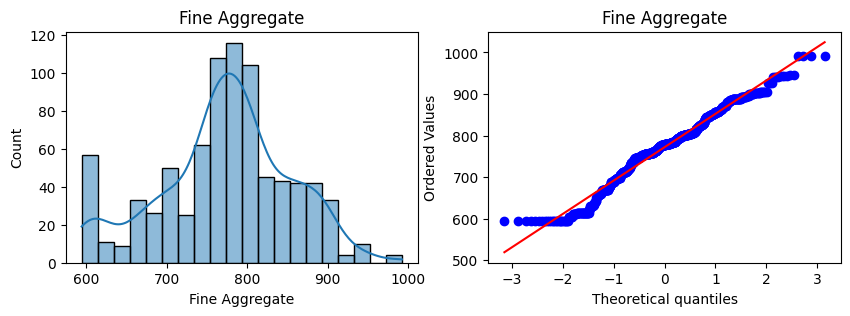

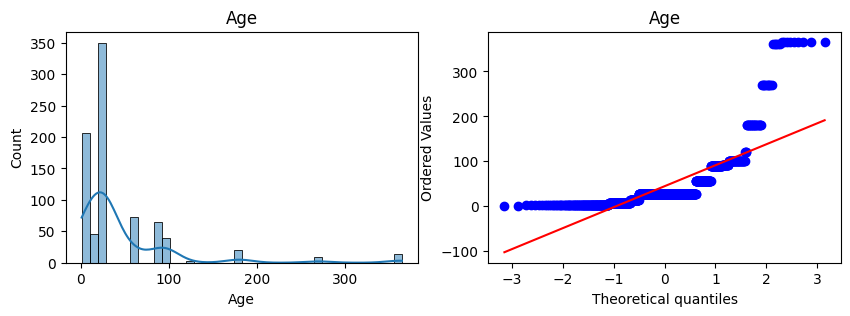

In [99]:
for col in X_train.columns:
    plt.figure(figsize=(10, 3))

    # Histogram plot using sns.histplot
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)  # kde=True adds the KDE plot
    plt.title(col)

    # QQ plot
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)

    plt.show()


In [100]:
# applying Power Trransformers 

In [109]:
# box-cox
pt = PowerTransformer (method = 'box-cox')
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform (X_test+0.000001)
pd.DataFrame({'columns':X_train.columns, 'box_cox_lambdas':pt.lambdas_})

,columns,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [102]:
# Retrain model with transformed input features
lr=LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred = lr.predict(X_test_transformed)

r2_score (y_test, y_pred)

0.8047825005397713

In [110]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(x+0.000001)
np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

0.666295031974616

In [111]:
# 62 ---> 66

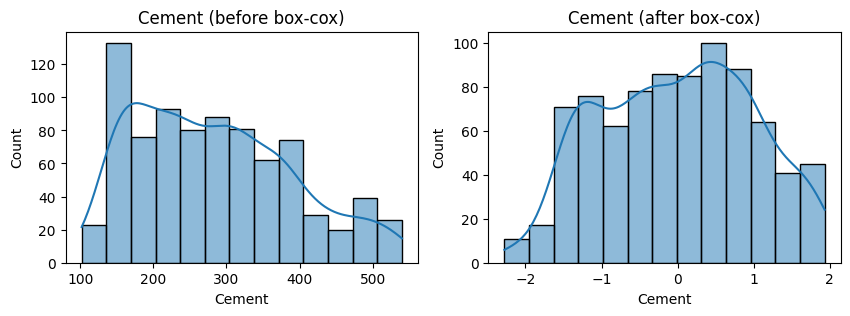

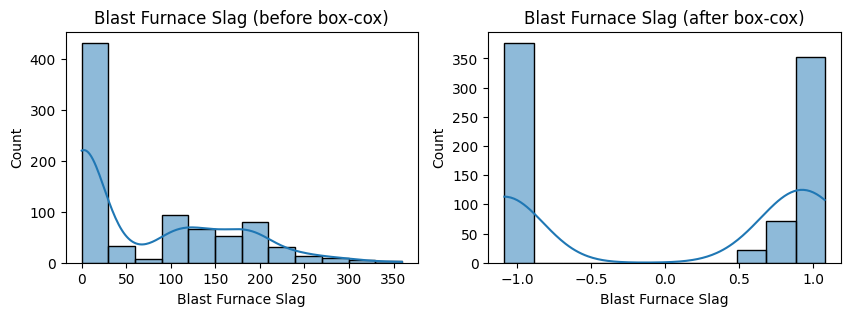

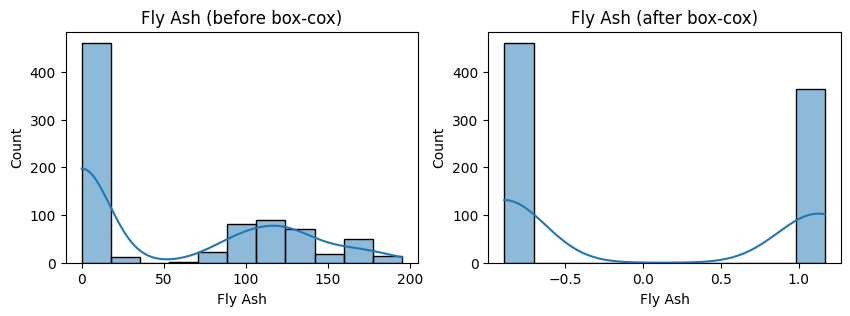

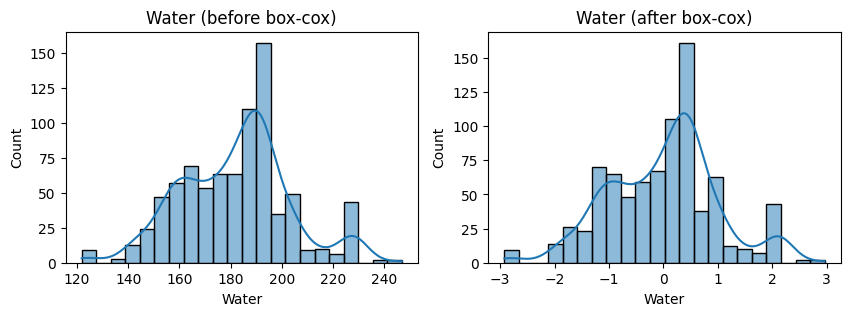

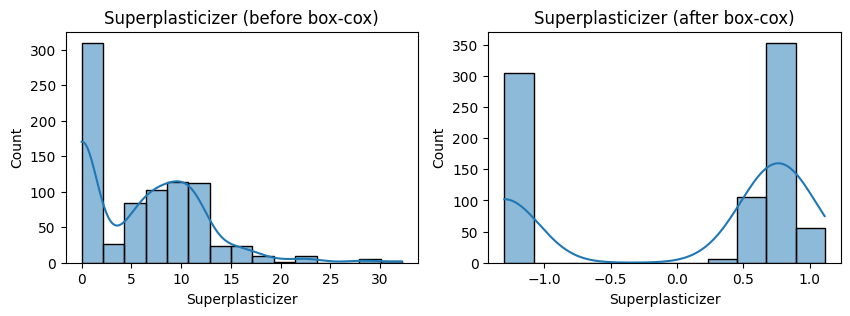

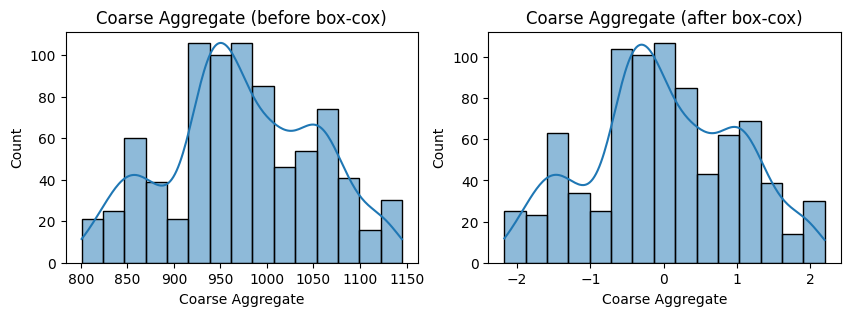

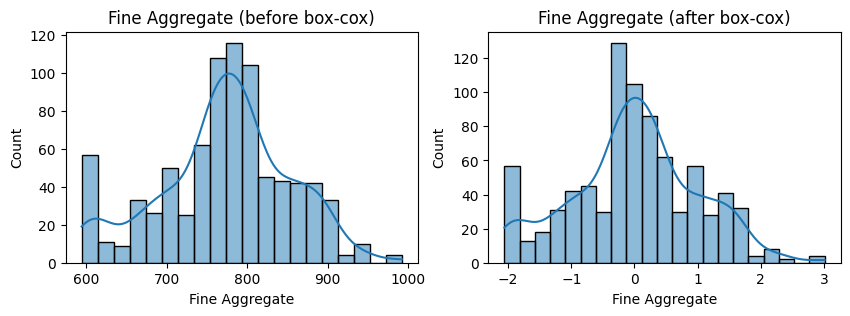

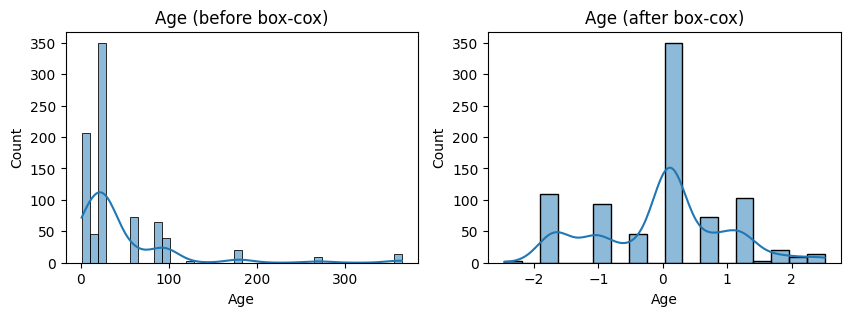

In [120]:
# before and after box-cox comparision
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
for col in X_train_transformed.columns:
    plt.figure(figsize=(10, 3))

    # Histogram plot using sns.histplot
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)  # kde=True adds the KDE plot
    plt.title(col+' (before box-cox)')

    # QQ plot
    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(col+' (after box-cox)')

    plt.show()

In [123]:
# Yeo-Johnson transform
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(x+0.000001)
np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

0.683462522889421

In [124]:
# box-cox ---> 66
# yeo-johnson --> 68